# Data Loading
This notebook serves as a demo for how to load in and clean the data we will be using for our final project. <br/>
Library dependencies:
- NumPy
- Matplotlib
- Pandas
- openpyxl

In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## National CDC Vaccination Trends
Uploaded to data folder. Contains US vaccination data describing the number or percentage of individuals who recieved a dosage by date and demographic category from 13 December 2020 through 10 May 2023. <br/>
The code below loads and inspects the data, before converting the relevant information into three arrays, corresponding to the three COVID vaccines being tracked:
1. The initial COVID vaccine
2. The second followup shot
3. The bivalent COVID vaccine

Finally, the vaccine information is plotted as a sanity check, and as a starting place for creating figures in our code later. Keep in mind that certain demographic categories are overlapping, e.g. there is a Children under 5 category and a Children Aged 2-4 category. When we figure out which age groups we are specifically interested in looking at, we will need to clean the data further. 

In [15]:
#load in data file
filename = 'CDC_Vaccination_Demographics_in_the_United_States_National_.csv'
path = f'../data/{filename}'
cdc_df = pd.read_csv(path)
print(cdc_df.shape)
cdc_df.head()

(29886, 25)


,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,...,Booster_Doses_Yes_Last14Days,Second_Booster_Vax_pct_agegroup,Second_Booster_Pop_Pct_known,Second_Booster_Pop_Pct_US,Second_Booster_Pop_Pct_known_Last14Days,Second_Booster,Second_Booster_Last14Days,Bivalent_Booster,Bivalent_Booster_Pop_Pct_agegroup,Bivalent_Booster_Pop_Pct_known
0,05/10/2023,Race_eth_NHAIAN,1911855,0.9,0.7,1588653,78.5,65.2,0.9,0.7,...,914,50.1,0.6,0.5,0.9,202047.0,592.0,378599.0,15.5,0.7
1,05/10/2023,Age_unknown,9344,0.0,0.0,2491,NaN,NaN,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,05/10/2023,Race_eth_NHAsian,13983704,6.8,5.2,12609000,73.6,66.4,6.9,5.5,...,6400,56.2,6.1,5.5,7.1,2027791.0,4897.0,4200667.0,22.1,8.3
3,05/10/2023,Race_eth_NHMult_Oth,12665103,6.2,4.7,11389487,NaN,NaN,6.2,4.9,...,4837,54.9,6.1,5.6,6.0,2053261.0,4104.0,3203837.0,NaN,6.3
4,05/10/2023,Race_eth_NHBlack,21157654,10.3,7.8,18545870,51.3,45.0,10.1,8.0,...,7656,47.9,8.2,7.4,10.8,2727568.0,7417.0,3900005.0,9.5,7.7


In [16]:
#list the unique dates and demographic categories along with how frequently they appear
print(cdc_df['Date'].value_counts())
print(cdc_df['Demographic_category'].value_counts())

Date
05/10/2023    34
09/27/2021    34
10/08/2021    34
10/07/2021    34
10/06/2021    34
              ..
07/18/2022    34
07/17/2022    34
07/16/2022    34
07/15/2022    34
12/13/2020    34
Name: count, Length: 879, dtype: int64
Demographic_category
Race_eth_NHAIAN           879
Ages_75+_yrs              879
Race_eth_unknown          879
Race_eth_known            879
Sex_known                 879
Ages_65+_yrs              879
Ages_25-49_yrs            879
US                        879
Race_eth_Hispanic         879
Age_unknown               879
Race_eth_NHWhite          879
Ages_5-11_yrs             879
Ages_2-4_yrs              879
Ages_16-17_yrs            879
Ages_50-64_yrs            879
Ages_<5yrs                879
Race_eth_NHOther          879
Ages_18-24_yrs            879
Sex_unknown               879
Sex_Female                879
Ages_<2yrs                879
Age_known                 879
Ages_12-17_yrs            879
Ages_<12yrs               879
Race_eth_NHMultiracial    87

In [21]:
#pick out columns of interest
cols = ['Date', 'Demographic_category', 'Administered_Dose1_pct_agegroup', 
        'Series_Complete_Pop_pct_agegroup', 'Bivalent_Booster_Pop_Pct_agegroup']
#pick out which demographic groups we want to look at. For now I've chosen age.
demographic = 'Ages'

#drop all columns and rows that don't match our desired statistics and demographics
cdc_df = cdc_df[cols]
cdc_df = cdc_df.loc[cdc_df['Demographic_category'].str.contains(demographic)]

#replace any missing values with zero
print(cdc_df.isna().sum())
cdc_df.fillna(0.0)
cdc_df.head()

Date                                     0
Demographic_category                     0
Administered_Dose1_pct_agegroup          0
Series_Complete_Pop_pct_agegroup         0
Bivalent_Booster_Pop_Pct_agegroup    10329
dtype: int64


,Date,Demographic_category,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Bivalent_Booster_Pop_Pct_agegroup
7,05/10/2023,Ages_25-39_yrs,83.4,69.6,10.7
8,05/10/2023,Ages_40-49_yrs,89.0,76.6,14.4
9,05/10/2023,Ages_65-74_yrs,95.0,95.0,41.9
11,05/10/2023,Ages_<12yrs,28.3,22.0,3.1
12,05/10/2023,Ages_12-17_yrs,72.2,61.8,7.8


A few of the demographic categories overlap, e.g. there is an Ages <5 and an Ages 2-4 category. When we decide what demographic categories work best, we can clean this up more. For now, we will leave it as-is

In [22]:
#now look at the different demographic values for the cleaned up array
print(cdc_df['Demographic_category'].value_counts())

Demographic_category
Ages_25-39_yrs    879
Ages_40-49_yrs    879
Ages_65-74_yrs    879
Ages_<12yrs       879
Ages_12-17_yrs    879
Ages_<2yrs        879
Ages_18-24_yrs    879
Ages_65+_yrs      879
Ages_25-49_yrs    879
Ages_75+_yrs      879
Ages_5-11_yrs     879
Ages_2-4_yrs      879
Ages_16-17_yrs    879
Ages_50-64_yrs    879
Ages_<5yrs        879
Ages_12-15_yrs    879
Name: count, dtype: int64


**Final data arrays** <br/>
Array layout will look like:
|Age group 0|Age group 1|...|
|-----|-----|-----|
|vax % day 0|vax % day 0|...|
| vax % day 1 | vax % day 1 | ...|
|...|...|...|
|vax % final day|vax % final day|...|

Where each of the three data points: first dose, complete series, and bivalent dose are their own arrays

In [59]:
def get_vax_array(cdc_df, ages, vax, num_days=879):
    #creates the array shown above for a single vaccine type
    vax_arr = np.zeros((num_days,ages.shape[0]))
    for col_idx, age in enumerate(ages):
        #get the correct time series from the data frame
        age_vax_vec = cdc_df.loc[cdc_df['Demographic_category'] == age, [vax]].values
        age_vax_vec = age_vax_vec.reshape((num_days,))
        #swap to chronological order from reverse chronological
        age_vax_vec = np.flipud(age_vax_vec)
        vax_arr[:,col_idx] = age_vax_vec
    return vax_arr

In [62]:
#get a list of age categories and vaccines
demographic_names = cdc_df['Demographic_category'].unique()
dose_names = cols[2:]

#create the arrays described above
first_dose_arr  = get_vax_array(cdc_df, demographic_names, dose_names[0])
fully_vaxed_arr  = get_vax_array(cdc_df, demographic_names, dose_names[1])
bivalent_dose_arr  = get_vax_array(cdc_df, demographic_names, dose_names[2])

Plotting the data as a sanity check, and to have for potential figures in the report

In [87]:
def plot_data(dose_arr, demographic_names, dose_name, savepath=None):
    num_days = dose_arr.shape[0]
    title = f'Percentage of Americans Who Received {dose_name}'
    days = [i for i in range(num_days)]
    fancy_labels = [label.replace('Ages', '').replace('yrs', '').replace('_','') for label in demographic_names]
    
    for i, col in enumerate(dose_arr.T):
        plt.plot(days, col, label=fancy_labels[i])
    
    plt.xlim([0, num_days])
    plt.ylim([0, 100])

    #this is hard coded in because I was too lazy to write a function to compute dates!
    plt.xticks([0, num_days//2, num_days], ['12/13/2020', '2/25/2022', '5/10/2023'])
    
    plt.legend(bbox_to_anchor=(1.05, 1.0))
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Percentage Vaccinated')

    if savepath:
        plt.savefig(savepath, dpi=200, bbox_inches='tight')
        
    plt.show()

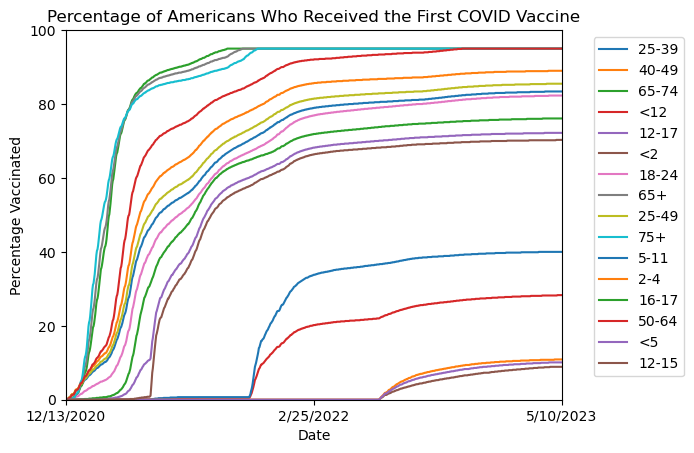

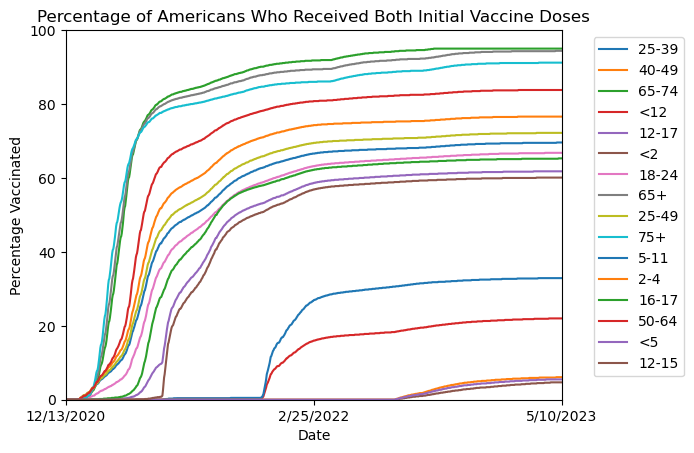

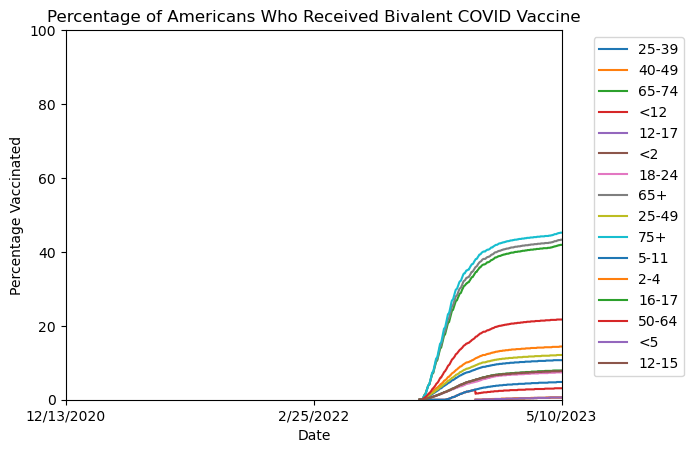

In [88]:
plot_data(first_dose_arr, demographic_names, 'the First COVID Vaccine')
plot_data(fully_vaxed_arr, demographic_names, 'Both Initial Vaccine Doses')
plot_data(bivalent_dose_arr, demographic_names, 'Bivalent COVID Vaccine')

## Prem et al., 2017 Contact Pattern Data

Uploaded to data folder as a .zip file. Contains contact matrix information for 152 countries at home, school, work, and overall described in 5 year age ranges from 0 - 80 years.

In [4]:
#unzip file. This only needs to be run a single time
!unzip '../data/Prem2017_files.zip' '../data/'

Archive:  ../data/Prem2017_files.zip
  inflating: contact_matrices_152_countries/MUestimates_all_locations_1.xlsx  
  inflating: contact_matrices_152_countries/MUestimates_all_locations_2.xlsx  
  inflating: contact_matrices_152_countries/MUestimates_home_1.xlsx  
  inflating: contact_matrices_152_countries/MUestimates_home_2.xlsx  
  inflating: contact_matrices_152_countries/MUestimates_other_locations_1.xlsx  
  inflating: contact_matrices_152_countries/MUestimates_other_locations_2.xlsx  
  inflating: contact_matrices_152_countries/MUestimates_school_1.xlsx  
  inflating: contact_matrices_152_countries/MUestimates_school_2.xlsx  
  inflating: contact_matrices_152_countries/MUestimates_work_1.xlsx  
  inflating: contact_matrices_152_countries/MUestimates_work_2.xlsx  


In [29]:
#load data and inspect
filename = 'MUestimates_all_locations_'
filepath = f'../data/contact_matrices_152_countries/{filename}1.xlsx'
contact_data_1 = pd.read_excel(filepath)
#second part of the spreadsheet is missing a header - must load in separately
filepath = f'../data/contact_matrices_152_countries/{filename}2.xlsx'
contact_data_2 = pd.read_excel(filepath, header=None)
#display some information as a sanity check
print(contact_data_1.shape)
print(contact_data_2.shape)
contact_data_1.head()

(16, 16)
(16, 16)


/Users/morganbyers/miniconda3/envs/homework-env/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/morganbyers/miniconda3/envs/homework-env/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
0,2.051664,0.901357,0.473320,0.320550,0.425390,0.687459,0.901785,0.802459,0.465565,0.275193,0.309363,0.250857,0.159005,0.119148,0.078022,0.043325
1,0.855141,4.540186,1.265412,0.389904,0.227181,0.499325,0.807145,0.922449,0.814880,0.358563,0.240133,0.212232,0.164684,0.115508,0.059623,0.044014
2,0.361364,2.026261,10.048570,1.338142,0.497388,0.380946,0.559516,0.923764,1.204172,0.710505,0.390607,0.197814,0.118326,0.116559,0.094754,0.071161
3,0.216499,0.550970,4.125416,15.007152,2.022311,0.851834,0.614685,0.889912,1.214767,1.259738,0.669806,0.248984,0.110437,0.081201,0.050955,0.035323
4,0.314469,0.269606,0.441619,3.547214,5.101035,1.903538,1.131624,0.994211,0.928219,1.198797,0.833206,0.410894,0.114922,0.059941,0.071169,0.053498


In [31]:
#convert contact data frames into arrays and sum them
contact_arr_1 = contact_data_1.values
contact_arr_2 = contact_data_2.values
print(contact_arr_1.shape, contact_arr_2.shape)
contact_arr_total = contact_arr_1 + contact_arr_2
print(contact_arr_total.shape)

(16, 16) (16, 16)
(16, 16)


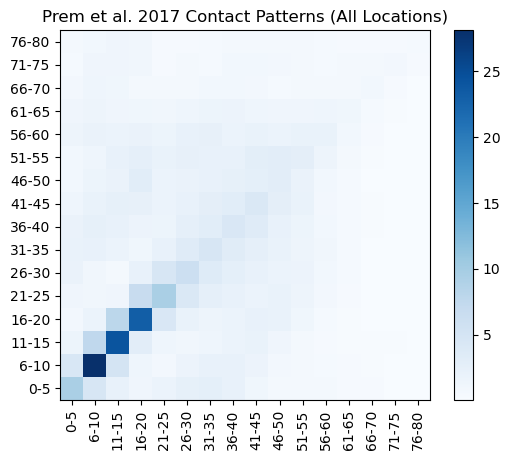

In [34]:
#create a heatmap of the contact data
#TODO: check how the ages are delineated in the data!
demographic_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', 
                      '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70',
                     '71-75', '76-80']

plt.imshow(contact_arr_total, origin='lower', cmap='Blues')

tick_locations = [i for i in range(16)]
plt.xticks(tick_locations, demographic_labels, rotation=90)
plt.yticks(tick_locations, demographic_labels)
plt.colorbar()

plt.title('Prem et al. 2017 Contact Patterns (All Locations)')
plt.show()

## Our World in Data Weekly COVID Cases and Deaths
The data are too large to upload to Github, so they must be downloaded individually. 

In [74]:
#from website: date ranges for data
first_day = '1/20/2020'
last_day = '4/7/2024'

### Load Weekly Cases

In [84]:
filename = 'weekly_cases.csv'
filepath = f'../data/{filename}'
cases_df = pd.read_csv(filepath)

In [85]:
#drop all NaNs and only look at USA
cases_df = cases_df.fillna(0.0)
cases_df = cases_df[['United States']]
print(cases_df.head())
#turn dataframe into an array
cases_arr = cases_df.values
print(cases_arr.shape)

   United States
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
(1555, 1)


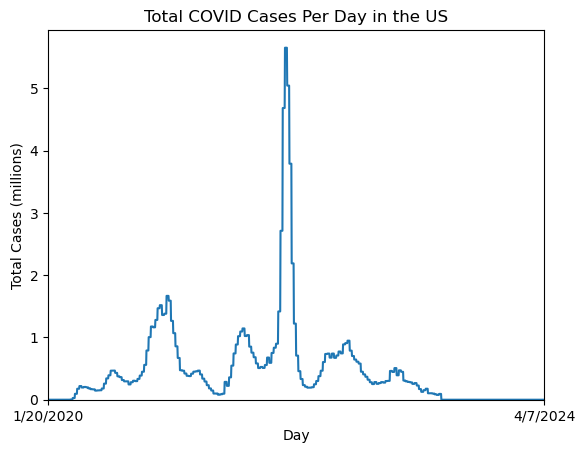

In [79]:
days = [i for i in range(cases_arr.shape[0])]
cases_per_million = cases_arr / 1e6

plt.plot(days, cases_per_million)
plt.xlim([0, days[-1]])
plt.ylim([0, np.max(cases_per_million) + .05 * np.max(cases_per_million)])
plt.xticks([0, days[-1]], [first_day, last_day])
plt.xlabel('Day')
plt.ylabel('Total Cases (millions)')
plt.title('Total COVID Cases Per Day in the US')
plt.show()

### Weekly Deaths

In [86]:
filename = 'weekly_deaths.csv'
filepath = f'../data/{filename}'
deaths_df = pd.read_csv(filepath)

In [87]:
#drop all NaNs and only look at USA
deaths_df = deaths_df.fillna(0.0)
deaths_df = deaths_df[['United States']]
print(deaths_df.head())
#turn dataframe into an array
deaths_arr = deaths_df.values
print(deaths_arr.shape)

   United States
0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
(1555, 1)


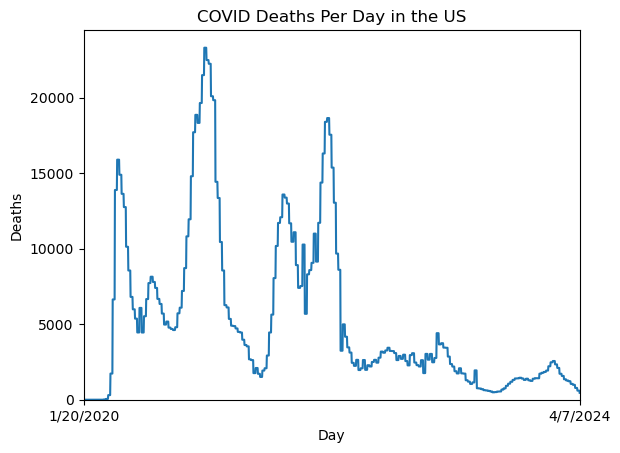

In [89]:
days = [i for i in range(deaths_arr.shape[0])]

plt.plot(days, deaths_arr)
plt.xlim([0, days[-1]])
plt.ylim([0, np.max(deaths_arr) + .05 * np.max(deaths_arr)])
plt.xticks([0, days[-1]], [first_day, last_day])
plt.xlabel('Day')
plt.ylabel('Deaths')
plt.title('COVID Deaths Per Day in the US')
plt.show()